In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' #matplotlib  한글 깨짐 방지

#그래픽 출력 결과를 셀 아래 표시
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/ESAA/data/과제/movies_train.csv")
test=pd.read_csv("/content/drive/MyDrive/ESAA/data/과제/movies_test.csv")
submission = ('/content/drive/MyDrive/ESAA/data/과제/submission.csv')

상영등급

상영등급 별 관객수

In [ ]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

Text(0, 0.5, 'count')

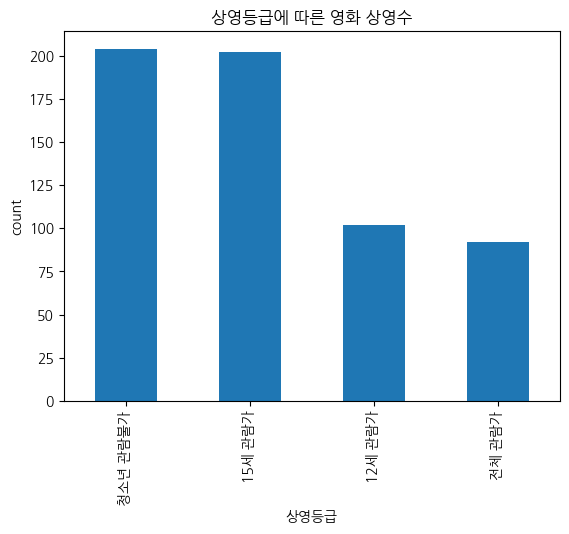

In [ ]:
train['screening_rat'].value_counts().plot(kind='bar')
plt.title('상영등급에 따른 영화 상영수')
plt.xlabel('상영등급')
plt.ylabel('count')

(0.0, 4000000.0)

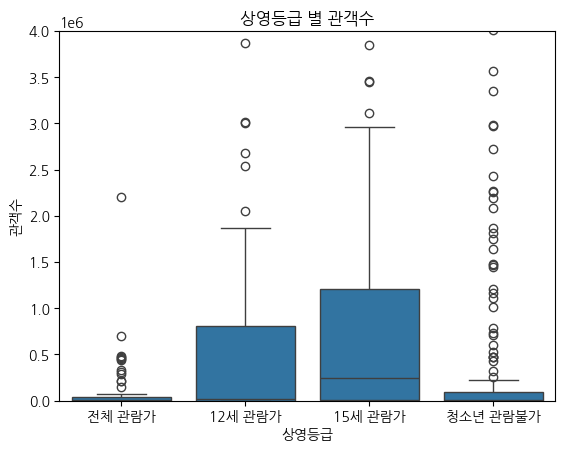

In [ ]:
ax=plt.subplots()
ax=sns.boxplot(x='screening_rat',y='box_off_num',data=train,order=ordersr)
plt.title("상영등급 별 관객수")
plt.xlabel('상영등급')
plt.ylabel('관객수')
plt.ylim(0,4000000)

관객 수 많은 순: 15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가


상영등급 별 장르

Text(0, 0.5, '관객수')

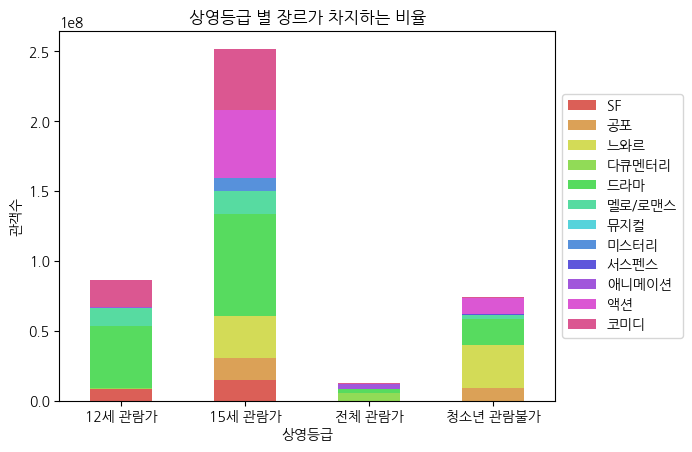

In [ ]:
order_g = train['genre'].unique()      #genre 값들의 순서 정하고 색깔 겹치지 않게 지정
order_g = np.sort(order_g)
color_g= sns.color_palette('hls', len(order_g))
a=train.groupby(['screening_rat','genre']).sum()
a=pd.DataFrame(a.reset_index())
a = a.pivot(index='screening_rat', columns='genre', values='box_off_num')
a.plot.bar(stacked=True,color=color_g) #누적 막대그래프
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  #legend 위치 조정
plt.xticks(rotation=0)
plt.title('상영등급 별 장르가 차지하는 비율')
plt.xlabel('상영등급')
plt.ylabel('관객수')

전체관람가에서는 다큐멘터리와 애니메이션 장르가 인기

12세, 15세 관람가에서는 드라마 장르가 인기

청소년 관람불가에서는 느와르 장르가 인기

스텝 수

주연 배우 수와 스텝

In [ ]:
train['num_actor'].describe()

count    600.000000
mean       3.706667
std        2.446889
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       25.000000
Name: num_actor, dtype: float64

Text(0, 0.5, '스텝수')

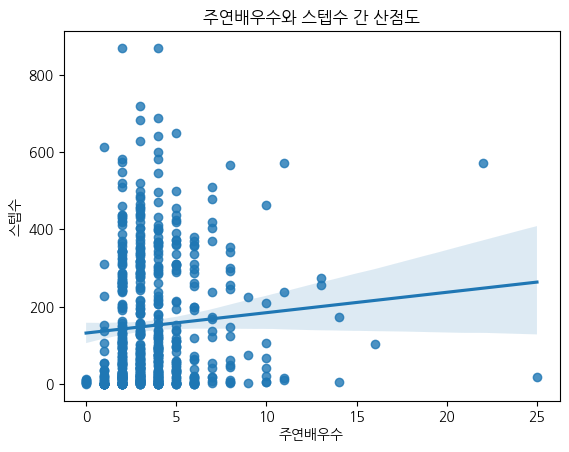

In [ ]:
ax=plt.subplots()
ax=sns.regplot(x='num_actor',y='num_staff',data=train)
ax.set_title('주연배우수와 스텝수 간 산점도')
ax.set_xlabel('주연배우수')
ax.set_ylabel('스텝수')

In [ ]:
train[['num_actor','num_staff']].corr()

,num_actor,num_staff
num_actor,1.000000,0.077871
num_staff,0.077871,1.000000


주연배우수와 스텝수: 양의 상관관계를 보인다. 하지만 회귀선에서 벗어나는 오차가 많음.

상관계수가 0.077871로 매우 작다 -> 경향성 찾기 힘듦.